<h1 style="color: blue;"> # Predicting heart disease using machine learning </h1>
This notebook looks into using various python based machine learning and data science libraries in an attempt to build a machine lerning model capable of predicting whethere or not someone has heart disease based on their medical attributes.

1. Problem definition
2. Data
3. Evaluation
4. features
5. Modelling
6. Experimentation

## Problem statement

Find if a person has a heart disease based on medical attributes.

## Data

14 attributes used:
      1. #3  (age)       
      2. #4  (sex)       
      3. #9  (cp)        
      4. #10 (trestbps)  
      5. #12 (chol)      
      6. #16 (fbs)       
      7. #19 (restecg)   
      8. #32 (thalach)   
      9. #38 (exang)     
      10. #40 (oldpeak)   
      11. #41 (slope)     
      12. #44 (ca)        
      13. #51 (thal)      
      14. #58 (num)       (the predicted attribute)

## Evaluation

Predicting whether or not a patient has heart disease during the proof of concept, we'll persue the project.

## Feature

### Create data dictionary

## Preparing tools
 numpy, pandas, and matplotlib for data analysis and manipulation

In [3]:
# import all the required tools.
# regular EDA (exploratory data analysis) and plotting libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import Machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [4]:
df = pd.read_csv("heart-disease.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA (Exploratory data analysis)

In [17]:
# how many of patients has heart disease or not
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

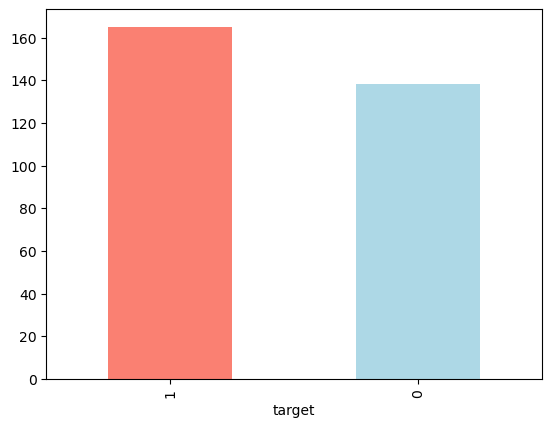

In [4]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
# heart disease fequency according to sex
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


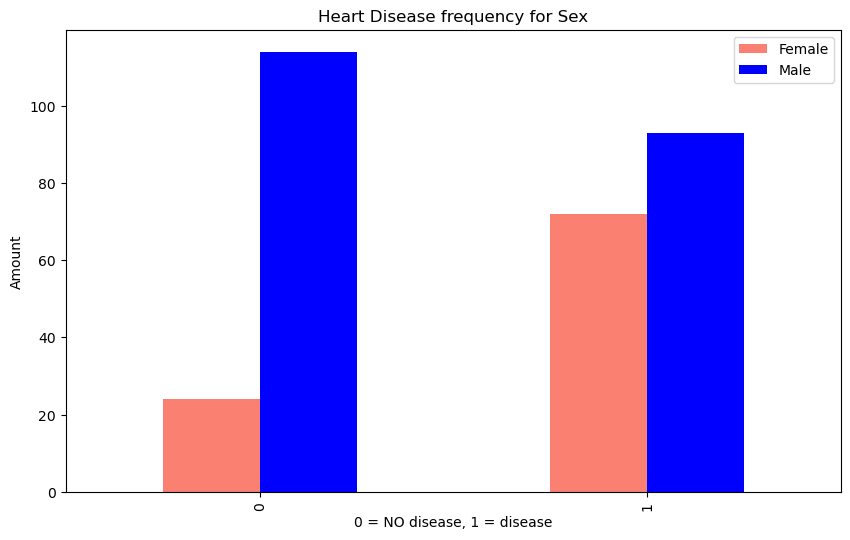

In [10]:
# create plot for cross tab

pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","blue"]);
plt.title("Heart Disease frequency for Sex")
plt.xlabel("0 = NO disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);

In [20]:
df.thalach.value_counts()

thalach
162    11
163     9
160     9
173     8
152     8
       ..
117     1
71      1
118     1
134     1
90      1
Name: count, Length: 91, dtype: int64

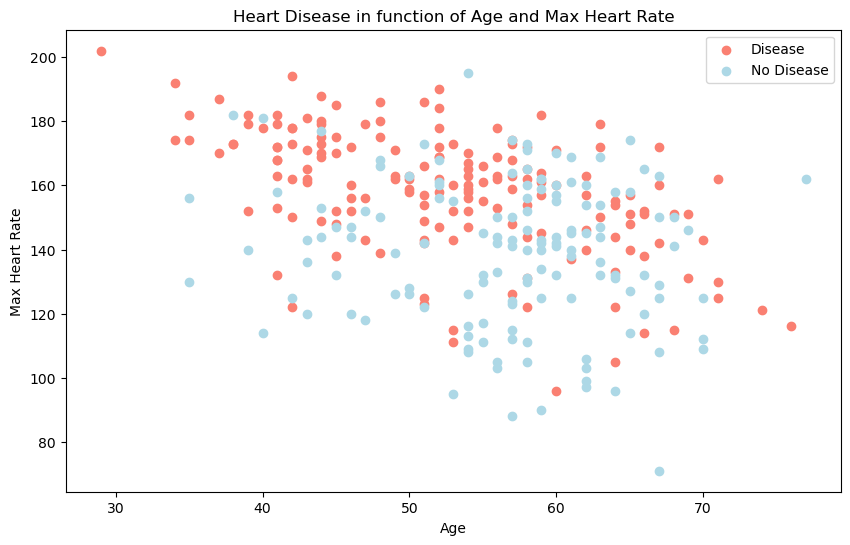

In [32]:
# age Vs Max heart rate for heart disease

plt.figure(figsize=(10,6))

#scatter with positive

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
           c="salmon");


#scatter with negative - no heart disease

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

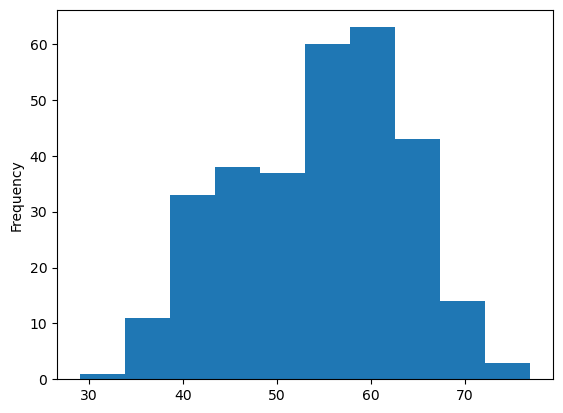

In [34]:
#check distibution\spread of the age column with histogram

df.age.plot.hist();

In [38]:
# Heart disease Frequency per Chest Pain Type

pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


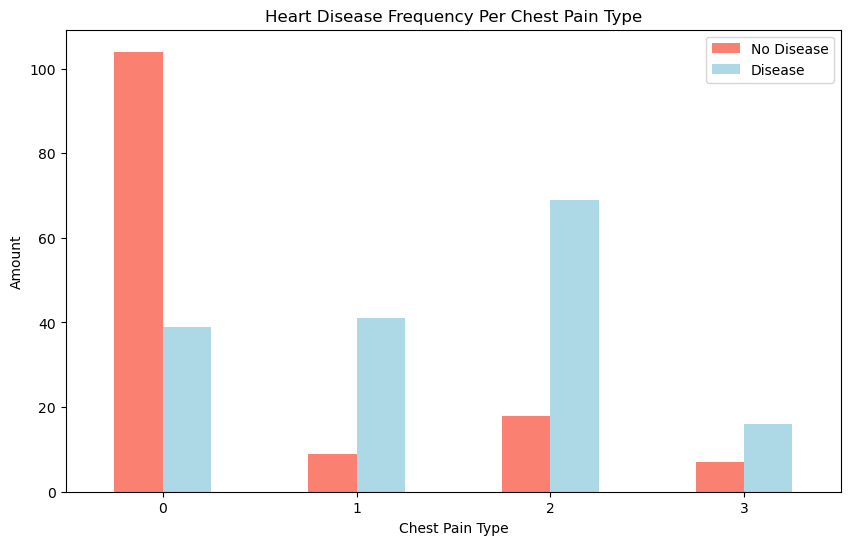

In [42]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [45]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


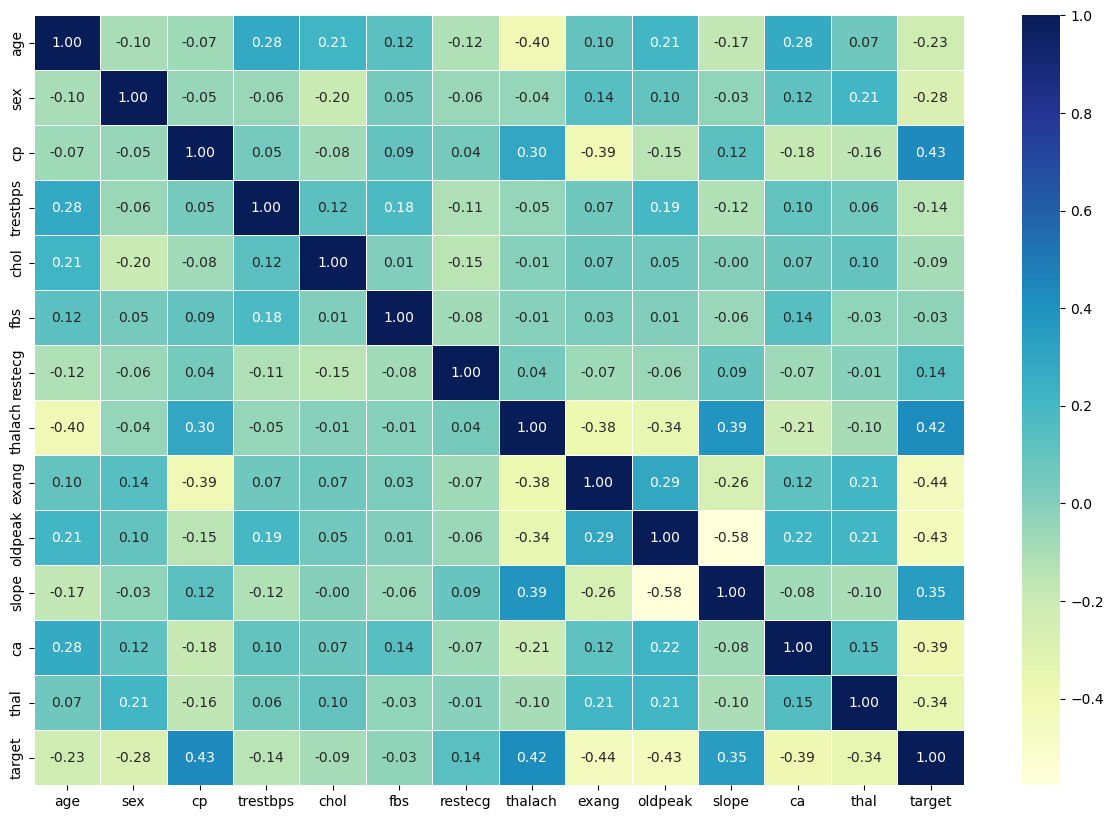

In [49]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

In [50]:
# Modelling

df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# split data into X and y
X = df.drop("target",axis=1)
y= df["target"]


In [6]:
# split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)



In [7]:
''' We are going to try 3 different machine learning models.
1. Logisitc Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
'''

# Put models in dictionary

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score model
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)

    model_score={}

    #loop through model
    for name, model in models.items():
        #fit the model to the data
        model.fit(X_train,y_train)
        #Evaluate the model and append its score to model_scores
        model_score[name] = model.score(X_test,y_test)

    return model_score
    

In [8]:
model_scores = fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

model_scores

C:\Users\Priyanka\Desktop\ML_Projects\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

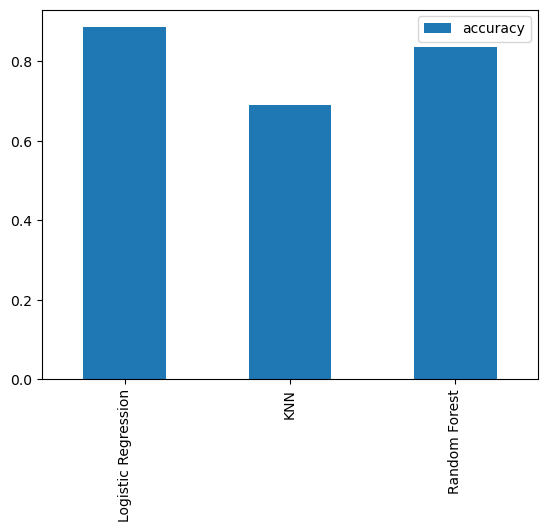

In [14]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

'''
# Lets look at the following
Hyperparameter tuning
feature importance
confusion matrix
cross-validation
Precision
Recall
F1 score
Classification report
ROC curve
Area under the curve (AUC)




In [9]:
#  Hyperparameter tuning

#tune in KNN

train_score = []
test_score = []

# create a list of different values for n_neighbours
neighbours = range(1,21)

# KNN instance '''
knn = KNeighborsClassifier()

# loop through different n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)

    # fit the algorithm
    knn.fit(X_train,y_train)

    # update the training list
    train_score.append(knn.score(X_train,y_train))

     # update the test list
    test_score.append(knn.score(X_test,y_test))


In [10]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [9]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

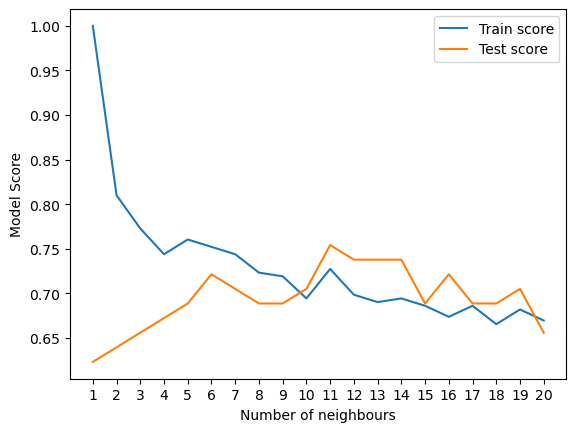

In [11]:
plt.plot(neighbours, train_score,label="Train score")
plt.plot(neighbours,test_score,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model Score")
plt.legend();

In [12]:
# Grid for LogisticRegression model 
log_reg_grid = {"C" : np.logspace(-4,4,20),
                "solver" :['liblinear']}

# Grid for RandomForestClassifier model

rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": ["None",3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}




In [13]:
# tune LogisticRegression model using RandomizedSearchCV

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [14]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [14]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [15]:
# tune RandomForestClassifier model using RandomizedSearchCV

np.random.seed(42)

rs_rfc = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Priyanka\Desktop\ML_Projects\heart_disease_project\env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Priyanka\Desktop\ML_Projects\heart_disease_project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Priyanka\Desktop\ML_Projects\heart_disease_project\env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': ['None', 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
rs_rfc.best_params_

{'n_estimators': np.int64(310),
 'min_samples_split': np.int64(2),
 'min_samples_leaf': np.int64(19),
 'max_depth': 5}

In [16]:
rs_rfc.score(X_test,y_test)

0.8688524590163934

In [16]:
# tune LogisticRegression more as it showed more accuracy compare to N-neighbours and RandomForestClassifier
# tune LogisticRegression using GridSearchCV

# Grid for LogisticRegression model 
log_reg_grid = {"C" : np.logspace(-4,4,30),
                "solver" :['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [17]:
# Check best parameters

gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [18]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [19]:
## Evaluating tuned machine learning classifier, beyond accuracy
'''
ROC curve and AUC score
confusion matrix
Classification report
Precision
Recall
F1-score
'''
# Make predictions with tuned model

y_preds = gs_log_reg.predict(X_test)

In [20]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [22]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

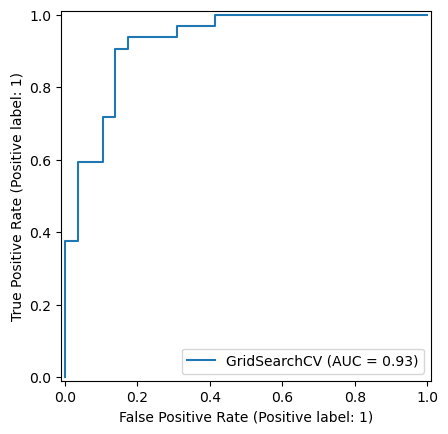

In [21]:
# Plot ROC curve and culculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test);


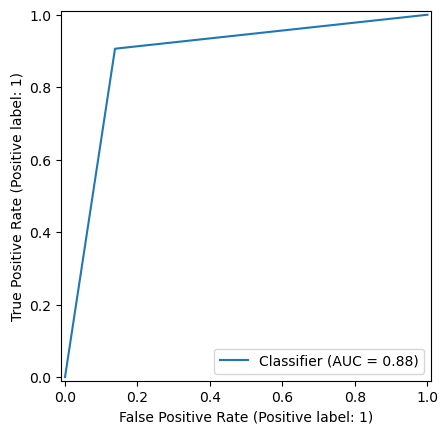

In [25]:
RocCurveDisplay.from_predictions(y_test,y_preds)

In [22]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


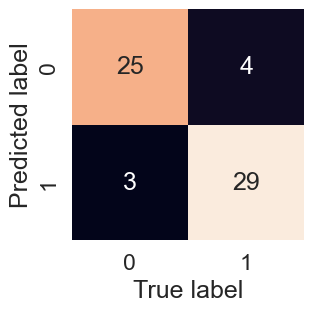

In [35]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    

plot_conf_mat(y_test, y_preds)    

In [36]:
## classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [37]:
# calculate validation matrics using cross-validation 

gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [38]:
clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [39]:
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc = np.mean(cv_acc)
print(cv_acc)

0.8446994535519124


In [40]:
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision = np.mean(cv_precision)
print(cv_precision)

0.8207936507936507


In [41]:
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall = np.mean(cv_acc)
print(cv_recall)

0.8446994535519124


In [29]:
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")

In [32]:
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_acc)
print(cv_f1)

0.8446994535519124


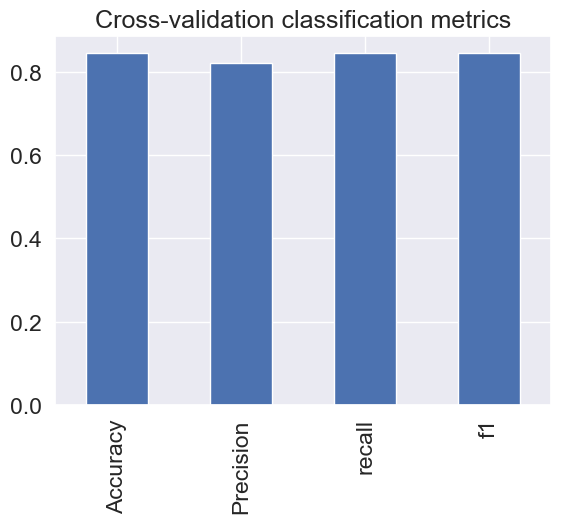

In [33]:
# Plot cross-validate matrix

cv_matrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                           "recall":cv_recall,
                           "f1":cv_f1},
                         index=[0])

cv_matrics.T.plot.bar(title="Cross-validation classification metrics",
                      legend= False);


In [42]:
# find feature importance for our logisticRegression model

clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")

clf.fit(X_train,y_train);

In [43]:
# check coef_
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [45]:
# Match coef_s of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672721856887734),
 'sex': np.float64(-0.860445816920919),
 'cp': np.float64(0.6606707303492849),
 'trestbps': np.float64(-0.011569930902919925),
 'chol': np.float64(-0.001663741604035976),
 'fbs': np.float64(0.04386130751482091),
 'restecg': np.float64(0.3127578715206996),
 'thalach': np.float64(0.02459360818122666),
 'exang': np.float64(-0.6041303799858143),
 'oldpeak': np.float64(-0.5686285194546157),
 'slope': np.float64(0.4505161679452401),
 'ca': np.float64(-0.6360986316921434),
 'thal': np.float64(-0.6766337521354281)}

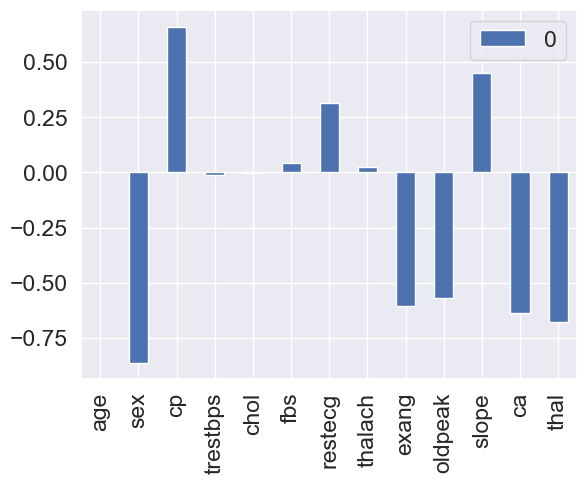

In [47]:
# visualize feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar();

In [48]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
